# Virtual Screening with a pharmacophore

In [1]:
import pyunitwizard as puw
import openpharmacophore as oph
from openpharmacophore import mol_db

We want to screen a database of molecules with a pharmacophore to find potential matches. 
We start by defining our pharmacophore model

In [2]:
pharmacophore = oph.Pharmacophore([
    oph.PharmacophoricPoint(
        feat_type="hb acceptor",
        center=puw.quantity([2.35, 1.94, -0.68], "angstroms"),
        radius=puw.quantity(1.0, "angstroms"),
    ),
    oph.PharmacophoricPoint(
        feat_type="hydrophobicity",
        center=puw.quantity([1.57, -2.53, 2.15], "angstroms"),
        radius=puw.quantity(1.0, "angstroms"),
    ),
    oph.PharmacophoricPoint(
        feat_type="aromatic ring",
        center=puw.quantity([6.19, 1.34, -1.36], "angstroms"),
        radius=puw.quantity(1.0, "angstroms"),
    ),
])

In [3]:
viewer = oph.Viewer()
viewer.add_components([pharmacophore])
viewer.show()

NGLWidget()

We will create a database of molecules loading them from different files

In [4]:
file1 = "../data/screening/ligands_1.smi"
file2 = "../data/screening/ligands_2.smi"

In [5]:
! cat {file1}

Smiles Name
[H]/N=C(\C1CCC(CC1)CNC(=O)[C@@H]2C=C(CN3N2C(=O)N(C3=O)CC(c4ccccc4)c5ccccc5)C)/N IH2
CN[C@H](Cc1ccccc1)C(=O)N2CCC[C@H]2C(=O)NCC3CCC(CC3)N MIN
c1ccc(cc1)S(=O)(=O)CCN2C(=O)N3CC=C[C@H](N3C2=O)C(=O)NC4CCC(CC4)c5cnc([nH]5)N 00R
c1ccc(cc1)S(=O)(=O)CCN2C(=O)N3CC=C[C@H](N3C2=O)C(=O)NCC4CCC(CC4)N 00P
[H]/N=C(/c1ccc(cc1)C[C@H](C(=O)N2CCCCC2)NC(=O)CNS(=O)(=O)c3ccc4ccccc4c3)\N MID

In [6]:
! cat {file2}

Smiles Name
[H]/N=C(\c1ccc2c(c1)cc([nH]2)C(=O)N3CCC(CC3)Cc4ccccc4)/N BPP
CCC1CCN(CC1)C(=O)[C@H](CCCNC(=[NH2+])N)NS(=O)(=O)c2cccc3c2cccc3N(C)C 0ZI
C[C@H]1CN2c3c(cc(cc3NC2=S)Cl)CN1CC=C(C)C TB9
CC(C)c1c(n(c(n1)COC(=O)N)Cc2ccncc2)Sc3cc(cc(c3)Cl)Cl S11
CC(C)OC(=O)N1c2cc(ccc2NC(=S)[C@@H]1CSC)OC HBY

In [7]:
db = mol_db.MolDB()
db.from_file_list([file1, file2], header=True)

We can now create a virtual screening object to which will pass our pharmacophore
and our molecule db

In [8]:
screener = oph.VirtualScreening([pharmacophore])
screener.screen(db)

print(f"{len(screener.matches[0])} molecule matched the pharmacophore")
print(f"{screener.fails[0]} molecule failed to match the pharmacophore")

4 molecule matched the pharmacophore
6 molecule failed to match the pharmacophore


We inspect the molecules that matched the pharmachore along with their alignment scores (RMSD)

RMSDs [0.8177257515854292, 0.8517769586370709, 0.7687604258063847, 0.9831765173894478]


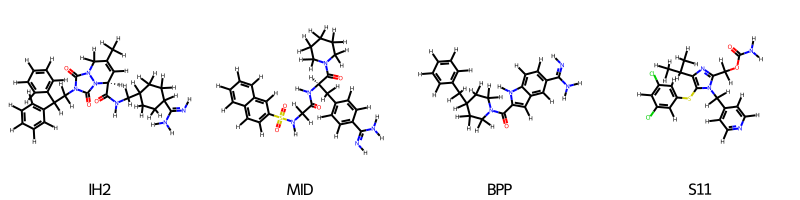

In [9]:
ligands = [m.ligand for m in screener.matches[0]]
legends = [
    m.ligand.to_rdkit().GetProp("_Name") for m in screener.matches[0]
]
scores = [m.rmsd for m in screener.matches[0]]

print("RMSDs", scores)
oph.draw_ligands(
    ligands=ligands, 
    n_per_row=4,
    legends=legends
)

We visualize the aligned ligands and the pharmacophore

In [10]:
idx = 0
viewer = oph.Viewer()
viewer.add_components([ligands[idx], pharmacophore])
viewer.show()

NGLWidget()

<img src="../../../_static/screening.png">

In [12]:
# Save pharmacophore image so it can be viewed in the documentation
 
import time
import threading

save = False

def save_image(view):
    im = view.render_image()
    while not im.value:
        time.sleep(0.1)
    save_path = "../../../_static/screening.png"
    with open(save_path, "wb") as fp:
        fp.write(im.value)    

def generate_image():
    thread = threading.Thread(target=save_image, args=(viewer.to_nglview(),), daemon=True)
    thread.start()
    

if save:
    generate_image()